<h3 style="background-color: #111; padding: 15px; font: bold 30px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px ; text-align: center">
Titanic Classification Models 🚢</h3>

# **Data Dictionary**
About Data: The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

 ---

## **Variable**	
survival	Survival	0 = No, 1 = Yes                                                                                     
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd                                                                               
sex	Sex	                                                                                                            
Age	Age in years	                                                                                                        
sibsp	                                                                                                                                        
parch		                                                                                                                
ticket	Ticket number	                                                                                                
fare	Passenger fare	                                                                                                                    
cabin	Cabin number	                                                                                                            
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton                                                      
Variable Notes                                                                                                          
pclass: A proxy for socio-economic status (SES)                                                                                     
1st = Upper                                                                                                             
2nd = Middle                                                                                                                        
3rd = Lower                                                                                                                         
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5                                                               
sibsp: The dataset defines family relations in this way...                                                                                      
Sibling = brother, sister, stepbrother, stepsister                                                                                              
Spouse = husband, wife (mistresses and fiancés were ignored)                                                                                      
parch: The dataset defines family relations in this way...                                                                                  
Parent = mother, father                                                                                                 
Child = daughter, son, stepdaughter, stepson                                                                                            
Some children travelled only with a nanny, therefore parch=0 for them.                              

import libraries


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

## **Data collection**
- load the data and get info about it

In [ ]:
df=pd.read_csv('./DataSet/df_clean-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
numerical_df=df.select_dtypes(include=['int64','float64'])
numerical_df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## **Data Cleaning**
- handle missing data
- handle duplicates
- handle outliers
- handle categorical data
- handle imbalanced data
  

### **Missing Data**

In [ ]:
def check_missing(df):
    if df.isnull().sum().sum() == 0:
        return 'No Missing Data'
    else: 
         total = df.isnull().sum().sort_values(ascending=False)
         percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
         missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data


import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

def auto_impute_missing(
    df: pd.DataFrame,
    add_missing_indicator: bool = False,
    drop_threshold: float = 0.5,
    random_state: int = 0,
    max_iter: int = 10
) ->(pd.DataFrame, pd.DataFrame):
    """
    Automatically imputes missing values based on column type, without using logging:
      - Numeric: Iterative Imputation (MICE)
      - Categorical: Mode imputation
      - Dates: Forward filling
      - Boolean: Mode imputation

    Also optionally drops columns with too many missing values,
    and can add missing‐value indicator flags.

    Parameters
    ----------
    df : pd.DataFrame
        Input DataFrame with missing values.
    add_missing_indicator : bool, default=False
        If True, adds a boolean column `<col>_missing` for each original col.
    drop_threshold : float, default=0.5
        Drop any column whose fraction of missing ≥ this threshold.
    random_state : int
        Random state for the IterativeImputer.
    max_iter : int
        Maximum iterations for the IterativeImputer.

    Returns
    -------
    df_imputed : pd.DataFrame
        DataFrame after dropping and imputing.
    missing_summary : pd.DataFrame
        Summary table showing total & percent missing per column
        before any operations.
    """
    df_imputed = df.copy()
    # 1) Compute missing-summary
    total_missing = df_imputed.isna().sum()
    pct_missing = total_missing / len(df_imputed)
    missing_summary = pd.DataFrame({
        'total': total_missing,
        'percent': pct_missing
    }).sort_values('percent', ascending=False)

    # If no missing at all, return immediately
    if missing_summary['total'].sum() == 0:
        print("No missing data detected.")
        return df_imputed, missing_summary

    print("Missing data summary:\n", missing_summary)

    # 2) Drop high-missing columns
    to_drop = missing_summary[missing_summary['percent'] >= drop_threshold].index.tolist()
    if to_drop:
        df_imputed.drop(columns=to_drop, inplace=True)
        print(f"Dropped columns (≥ {drop_threshold*100:.0f}% missing): {to_drop}")

    # 4) Identify types on the remaining columns
    num_cols = df_imputed.select_dtypes(include=np.number).columns
    cat_cols = df_imputed.select_dtypes(include=['object', 'category']).columns
    date_cols = df_imputed.select_dtypes(include=['datetime64[ns]', 'datetimetz']).columns
    bool_cols = df_imputed.select_dtypes(include='bool').columns

    # 5) Impute numeric via MICE
    if len(num_cols) > 0:
        imputer = IterativeImputer(max_iter=max_iter, random_state=random_state)
        df_imputed[num_cols] = imputer.fit_transform(df_imputed[num_cols])
        print("Imputed numeric columns via IterativeImputer:", list(num_cols))

    # 6) Impute categoricals via mode
    for col in cat_cols:
        mode_series = df_imputed[col].mode(dropna=True)
        fill_val = mode_series.iloc[0] if not mode_series.empty else "Missing"
        df_imputed[col].fillna(fill_val, inplace=True)
    if len(cat_cols) > 0:
        print("Imputed categorical columns via mode:", list(cat_cols))

    # 7) Forward-fill date columns
    for col in date_cols:
        df_imputed[col].fillna(method='ffill', inplace=True)
    if len(date_cols) > 0:
        print("Forward-filled date columns:", list(date_cols))
    # 8) Impute booleans via mode
    for col in bool_cols:
        mode_series = df_imputed[col].mode(dropna=True)
        fill_val = bool(mode_series.iloc[0]) if not mode_series.empty else False
        df_imputed[col].fillna(fill_val, inplace=True)
    if len(bool_cols) > 0:
        print("Imputed boolean columns via mode:", list(bool_cols))

    return df_imputed, missing_summary


In [22]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
check_missing(df)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [24]:
df_clean, miss = auto_impute_missing(df, drop_threshold=0.5, add_missing_indicator=True)

Missing data summary:
              total   percent
Cabin          687  0.771044
Age            177  0.198653
Embarked         2  0.002245
PassengerId      0  0.000000
Survived         0  0.000000
Pclass           0  0.000000
Name             0  0.000000
Sex              0  0.000000
SibSp            0  0.000000
Parch            0  0.000000
Ticket           0  0.000000
Fare             0  0.000000
Dropped columns (≥ 50% missing): ['Cabin']
Imputed numeric columns via IterativeImputer: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Imputed categorical columns via mode: ['Name', 'Sex', 'Ticket', 'Embarked']


C:\Users\DELL\AppData\Local\Temp\ipykernel_3204\649044641.py:92: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[col].fillna(fill_val, inplace=True)


In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(7), object(4)
memory usage: 76.7+ KB


In [19]:
check_missing(df_clean)

'No Missing Data'

### **Duplicate Data**

In [31]:
def check_duplicate(df):
    print(f'Number of duplicates: {df.duplicated().sum()}',df.duplicated().sum())
    per = df.duplicated().sum() / len(df)
    print(f'Percentage of duplicates: {per}')
    if df.duplicated().sum() > 0:
        print(df[df.duplicated()])
        print('dropped the duplicates')
    else:
        print("No duplicates")

In [32]:
check_duplicate(df_clean)

Number of duplicates: 0 0
Percentage of duplicates: 0.0
No duplicates


### **Outliers**

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def show_outliers_all_columns(df, show_summary: bool = True):
    """
    Displays professional boxplots for all numerical columns in the DataFrame.
    Outliers are visually highlighted and counted.
    
    Parameters:
    - df: pd.DataFrame
    - show_summary: bool, whether to print the outlier summary (default: True)
    
    Returns:
    - pd.DataFrame: Summary of outliers for each column
    """
    # Filter numeric columns only
    numeric_cols = df.select_dtypes(include=['number']).columns

    if len(numeric_cols) == 0:
        print("No numeric columns found.")
        return pd.DataFrame()

    # Set plotting style once
    sns.set(style="whitegrid")
    
    # Initialize list to store outlier information
    outlier_info = []
    
    for col in numeric_cols:
        # Drop missing values for the column
        col_data = df[col].dropna()
        if col_data.empty:
            continue
        
        # Calculate IQR and bounds
        Q1 = col_data.quantile(0.25)
        Q3 = col_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
        count = len(outliers)
        pct = count / len(col_data) if len(col_data) > 0 else 0
        
        # Store outlier info
        outlier_info.append({
            'column': col,
            'outlier_count': count,
            'outlier_percent': pct,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        })

        # Plot boxplot
        plt.figure(figsize=(10, 2.5))
        ax = sns.boxplot(x=col_data, color="#2E86AB", width=0.6, fliersize=5)
        ax.set_title(f"Boxplot of {col}", fontsize=14, weight='bold')
        ax.set_xlabel(col, fontsize=12)
        
        # Optional: Annotate outliers (adjusted for horizontal boxplot)
        for outlier in outliers:
            ax.text(outlier, 0, f"{round(outlier, 2)}", 
                    verticalalignment='center', fontsize=8, color='red')
        
        sns.despine(left=True)
        plt.tight_layout()
        plt.show()
    
    # Create and sort outlier summary DataFrame
    outlier_summary = pd.DataFrame(outlier_info)
    if not outlier_summary.empty:
        outlier_summary = outlier_summary.sort_values('outlier_percent', ascending=False)
    
    # Print summary if requested
    if show_summary and not outlier_summary.empty:
        print("Outlier Summary (count and %):")
        for _, row in outlier_summary.iterrows():
            print(f"- {row['column']}: {row['outlier_count']} outliers ({row['outlier_percent']:.2%})")
    
    return outlier_summary

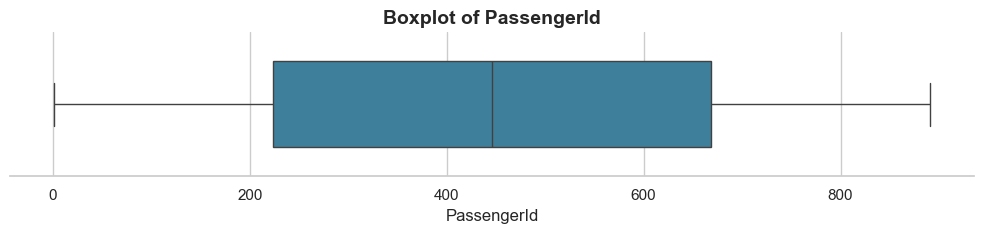

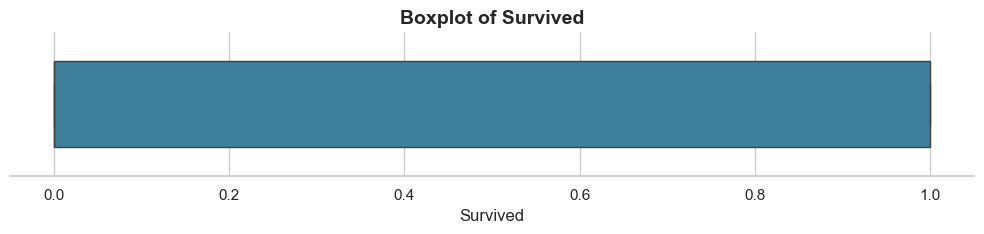

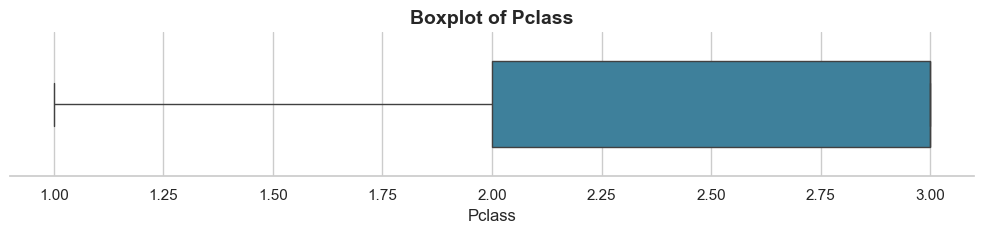

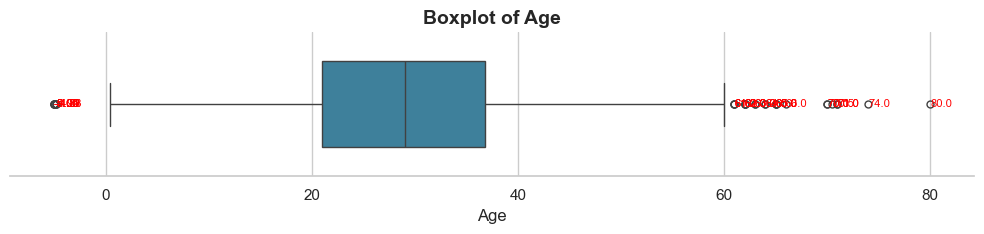

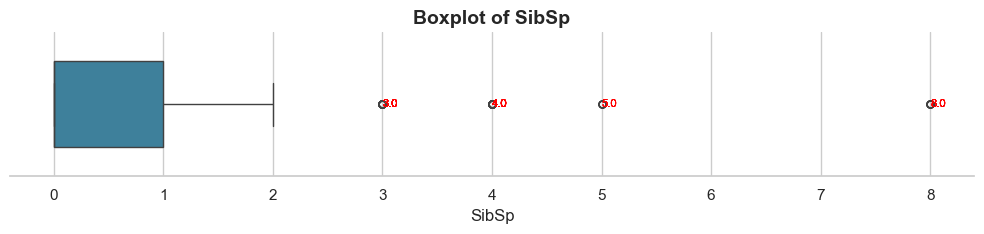

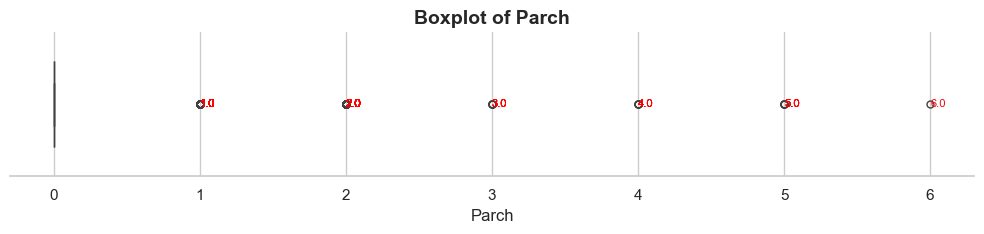

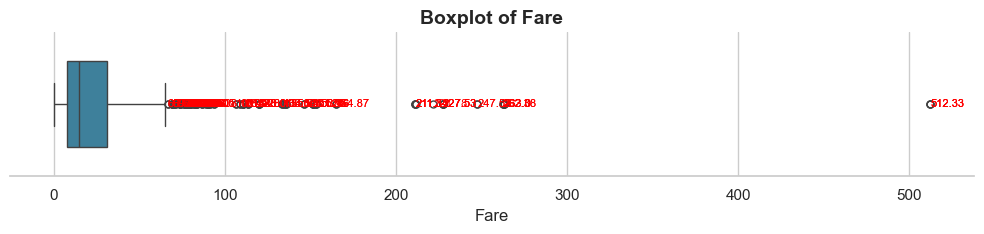

Outlier Summary (count and %):
- Parch: 213 outliers (23.91%)
- Fare: 116 outliers (13.02%)
- SibSp: 46 outliers (5.16%)
- Age: 29 outliers (3.25%)
- PassengerId: 0 outliers (0.00%)
- Survived: 0 outliers (0.00%)
- Pclass: 0 outliers (0.00%)


In [70]:
outliesr=show_outliers_all_columns(df_clean)

In [71]:
df_clean['Fare_log'] = np.log1p(df_clean['Fare'])
upper_bound_log = np.log1p(66.9063)
print(f"Upper Bound (Log Scale): {upper_bound_log}")
lower_bound_log = np.log1p(2)
print(f"Lower Bound (Log Scale): {lower_bound_log}")

Upper Bound (Log Scale): 4.218128813765682
Lower Bound (Log Scale): 1.0986122886681098


In [72]:

lower_extreme = 2  # Adjusting to avoid log(0) issues
upper_extreme = 6  # Removing values close to 7

# Filter the dataset
df_clean_filtered = df_clean[(df_clean['Fare_log'] > lower_extreme) & (df_clean['Fare_log'] < upper_extreme)]

In [73]:
# Check the number of removed rows
removed_rows = df_clean.shape[0] - df_clean_filtered.shape[0]
print(f"Number of rows removed: {removed_rows}")
df_clean_filtered['Fare_bin'] = pd.qcut(df_clean_filtered['Fare_log'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
df_clean_filtered['Fare'].fillna(df_clean_filtered['Fare'].median(), inplace=True)
df_clean_filtered['Fare_log'].fillna(df_clean_filtered['Fare_log'].median(), inplace=True)
    

Number of rows removed: 21


C:\Users\DELL\AppData\Local\Temp\ipykernel_3204\1969280007.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_filtered['Fare_bin'] = pd.qcut(df_clean_filtered['Fare_log'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_3204\1969280007.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to per

In [75]:
Q1 = df_clean_filtered['Age'].quantile(0.25)
Q3 = df_clean_filtered['Age'].quantile(0.75)
IQR = Q3 - Q1
 # Calculate lower bound
lower_bound_age = Q1 - 1.5 * IQR
# Filter out lower outliers
df_cleaned = df_clean_filtered[df_clean_filtered['Age'] >= lower_bound_age]
    
print(f"Removed {len(df_clean_filtered) - len(df_cleaned)} lower outliers from 'age' column.")

Removed 7 lower outliers from 'age' column.


In [77]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 863 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  863 non-null    float64 
 1   Survived     863 non-null    float64 
 2   Pclass       863 non-null    float64 
 3   Name         863 non-null    object  
 4   Sex          863 non-null    object  
 5   Age          863 non-null    float64 
 6   SibSp        863 non-null    float64 
 7   Parch        863 non-null    float64 
 8   Ticket       863 non-null    object  
 9   Fare         863 non-null    float64 
 10  Embarked     863 non-null    object  
 11  Fare_log     863 non-null    float64 
 12  Fare_bin     863 non-null    category
dtypes: category(1), float64(8), object(4)
memory usage: 88.7+ KB


### **Data types**

In [83]:
df_cleaned['Embarked'].value_counts()

Embarked
S    622
C    164
Q     77
Name: count, dtype: int64

In [85]:
categorical_df=df_cleaned.select_dtypes(include=['object'])
for col in categorical_df.columns:
    df_cleaned[col] = df_cleaned[col].astype('category') 

C:\Users\DELL\AppData\Local\Temp\ipykernel_3204\1623129072.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype('category')
C:\Users\DELL\AppData\Local\Temp\ipykernel_3204\1623129072.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype('category')
C:\Users\DELL\AppData\Local\Temp\ipykernel_3204\1623129072.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [86]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 863 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  863 non-null    float64 
 1   Survived     863 non-null    float64 
 2   Pclass       863 non-null    float64 
 3   Name         863 non-null    category
 4   Sex          863 non-null    category
 5   Age          863 non-null    float64 
 6   SibSp        863 non-null    float64 
 7   Parch        863 non-null    float64 
 8   Ticket       863 non-null    category
 9   Fare         863 non-null    float64 
 10  Embarked     863 non-null    category
 11  Fare_log     863 non-null    float64 
 12  Fare_bin     863 non-null    category
dtypes: category(5), float64(8)
memory usage: 127.4 KB


In [87]:
df_cleaned.to_csv('./DataSet/df_cleaned.csv', index=False)

## **Exploratory Data Analysis(EDA)**

### correlation 

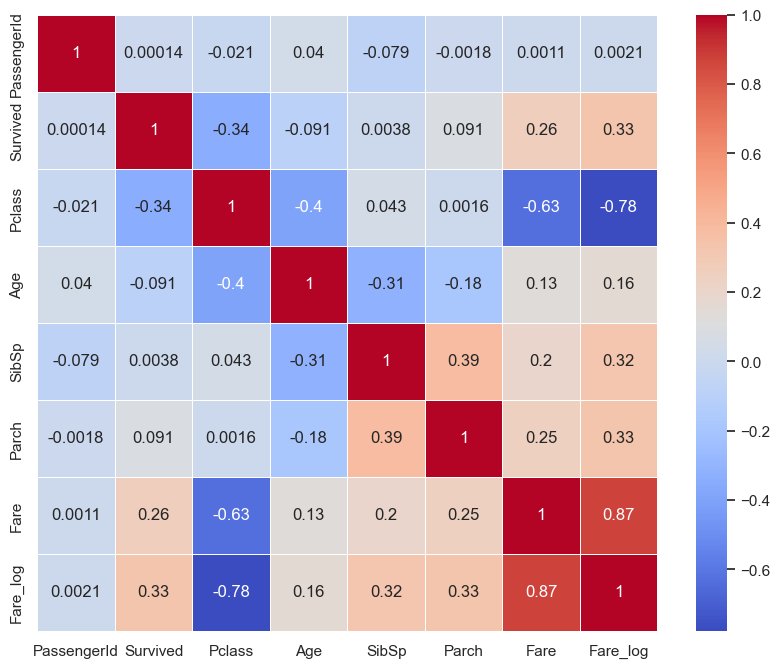

In [90]:
numerical_df=df_cleaned.select_dtypes(include=['int64','float64'])
cm = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

## **Advanced analysis**

## **Data preprocessing**

## **Feature Engenearing**

## **split data into train and test**

## **Model Selection and Training**

## **Model Evaluation**

## **Result and Compare Models**